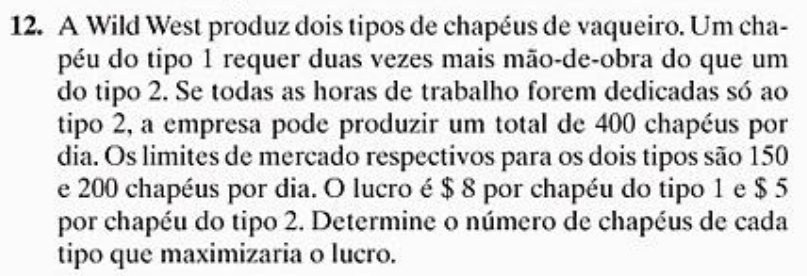

In [1]:
%pip install cplex
%pip install docplex

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from docplex.mp.model import Model

# Criação do modelo com um nome descritivo
model = Model('Producao_Otima_Chapeus_WildWest')

In [3]:
# --- Parâmetros extraídos do enunciado ---

# Nomes dos tipos de chapéu para referência
tipos_chapeu = ['tipo1', 'tipo2']

# Dados financeiros
lucro_por_chapeu = {'tipo1': 8, 'tipo2': 5}

# Limites de mercado (demanda máxima)
limite_mercado = {'tipo1': 150, 'tipo2': 200}

# A capacidade total de mão-de-obra é suficiente para fazer 400 chapéus do tipo 2.
# O tipo 1 requer o dobro da mão-de-obra do tipo 2.
# Modelamos isso como o percentual da capacidade total que cada unidade consome.
# 1 chapéu tipo 2 consome 1/400 da capacidade.
# 1 chapéu tipo 1 consome 2 * (1/400) = 1/200 da capacidade.
uso_capacidade_mao_de_obra = {
    'tipo2': 1/400,
    'tipo1': 2/400
}
limite_capacidade_total = 1 # Representa 100% da capacidade diária

In [4]:
# 1. Variáveis de Decisão
# Número de chapéus a serem produzidos de cada tipo
num_chapeus = model.integer_var_dict(tipos_chapeu, name='Chapeu')
# Chapéus são unidades inteiras.

# 2. Função Objetivo
# Maximizar o lucro total
expressao_lucro = (lucro_por_chapeu[t] * num_chapeus[t] for t in tipos_chapeu)
soma_lucro_total = model.sum(expressao_lucro)
model.maximize(soma_lucro_total)


# 3. Restrições

# Restrição 1: Capacidade de Mão-de-Obra
# A soma das frações da capacidade de mão-de-obra utilizadas não pode exceder 100% (ou 1).
expressao_uso_capacidade = (uso_capacidade_mao_de_obra[t] * num_chapeus[t] for t in tipos_chapeu)
soma_uso_capacidade = model.sum(expressao_uso_capacidade)
restr_capacidade_logica = soma_uso_capacidade <= limite_capacidade_total
model.add_constraint(restr_capacidade_logica, ctname='limite_mao_de_obra')

# Restrição 2: Limites de Mercado (Demanda)
for t in tipos_chapeu:
    restr_demanda_logica = num_chapeus[t] <= limite_mercado[t]
    model.add_constraint(restr_demanda_logica, ctname=f'limite_mercado_{t}')

In [5]:
# Define um tempo limite para o solver (opcional)
model.parameters.timelimit = 120

# Aciona o solver para encontrar a solução
print("--- Resolvendo o modelo ---")
solucao = model.solve(log_output=True)

print('\n------ SOLUÇÃO ÓTIMA ------\n')
print(solucao)

--- Resolvendo o modelo ---
Version identifier: 22.1.2.0 | 2024-12-10 | f4cec290b
CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               120
Found incumbent of value 0.000000 after 0.00 sec. (0.00 ticks)
Tried aggregator 1 time.
MIP Presolve eliminated 2 rows and 0 columns.
MIP Presolve added 1 rows and 1 columns.
Reduced MIP has 2 rows, 3 columns, and 5 nonzeros.
Reduced MIP has 0 binaries, 3 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.00 ticks)
Tried aggregator 1 time.
MIP Presolve eliminated 1 rows and 1 columns.
MIP Presolve added 1 rows and 1 columns.
Reduced MIP has 2 rows, 3 columns, and 5 nonzeros.
Reduced MIP has 0 binaries, 3 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.00 ticks)
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 16 threads.
Root relaxation solution time = 0.00 sec. (0.00 ticks)

        Nodes       